In [30]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

In [2]:
data_dir = "./LAB DATA/"
save_dir = "./latex/"

In [3]:
step10_file = data_dir + "RFC_Step10.csv"
step15_file = data_dir + "RFCS142_Step15.csv"
step17_file = data_dir + "RFCS142_Step17.csv"
step18_file = data_dir + "RFCS142_Step18.csv"

In [38]:
f_10, P_10 = np.loadtxt(step10_file, delimiter=',' , skiprows=20, usecols=(0,1), unpack=True)
f_15, P_15 = np.loadtxt(step15_file, delimiter=',' , skiprows=20, usecols=(0,1), unpack=True)
f_17, P_17 = np.loadtxt(step17_file, delimiter=',' , skiprows=20, usecols=(0,1), unpack=True)
f_18, P_18 = np.loadtxt(step18_file, delimiter=',' , skiprows=20, usecols=(0,1), unpack=True)

In [90]:
f_10 /=1e6
f_15 /= 1e6
f_17 /= 1e9
f_18 /= 1e9

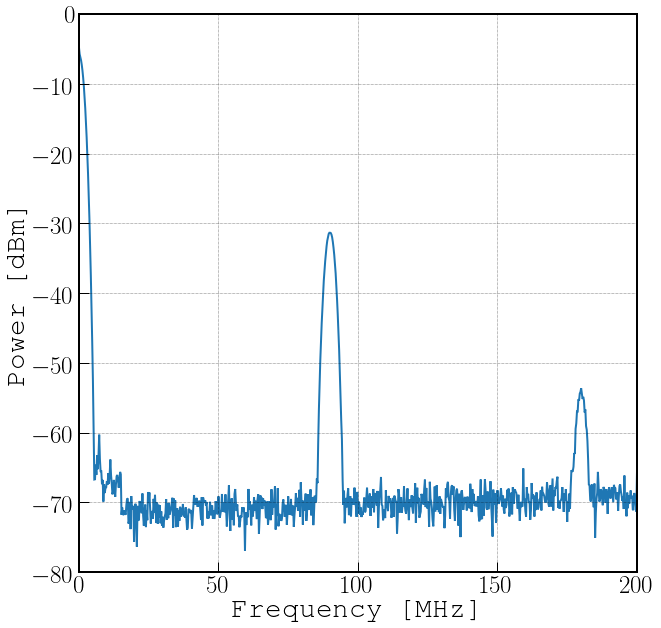

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(f_10, P_10)
ax.set_xlabel(r'Frequency [MHz]')
ax.set_ylabel(r'Power [dBm]')
ax.axis([0, 200, -80, 0])
ax.grid(which='both');
plt.savefig(save_dir + 'DC_to_200MHz.pdf')

In [7]:
# Find the peak IF power
mask = np.logical_and(f_10 > 50, P_10 > -35)
P_10[mask]

array([-34.29181337, -33.28039652, -32.48959382, -32.02793013,
       -31.5380635 , -31.36365843, -31.35515291, -31.4012446 ,
       -31.61172673, -32.02984719, -32.69597868, -33.54682047, -34.5456034 ])

In [8]:
# Do a curve fit to the few points within the mask as a quadratic approximation
# Model is X = [a, b, c] such that P_10[mask] = a * f_10[mask]^2 + b * f_10[mask] + c
A = np.vstack([f_10[mask]**2, f_10[mask], np.ones_like(f_10[mask])]).T
X = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, P_10[mask]))

quadratic = lambda f: X[0] * f**2 + X[1] * f + X[2]
f = np.linspace(np.min(f_10[mask]), np.max(f_10[mask]), 100)
P = quadratic(f)
print (np.max(P))

-31.2630841685


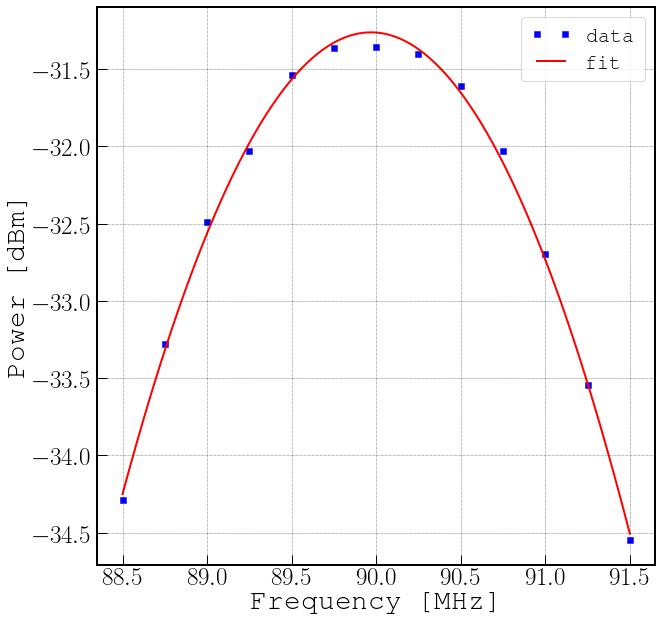

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(f_10[mask], P_10[mask], 'bs', label='data')
ax.plot(f, P, 'r', label='fit')
ax.set_xlabel(r'Frequency [MHz]')
ax.set_ylabel(r'Power [dBm]')
ax.axis('tight')
ax.legend(loc='best')
ax.grid(which='both');
plt.savefig(save_dir + 'DC_to_200MHz_zoomed.pdf')

In [11]:
IF_power = np.array([-29.62,-30.92,-33.83,-36.93,-39.05,-40.72,-42.46,-45.69][::-1] +\
                    [-31.58, -32.45,-32.72,-32.26, -31.3,-29.85,-28.74,-28.72,-29.44, \
                     -30.42,-31.1,-31.45,-31.19,-30.34,-29.42,-28.98,-29.9,-29.5,-30.2,-30.9])
RF_freq = np.array([5.88 - _*0.01 for _ in range(8)][::-1] + [5.9 + _*0.01 for _ in range(20)]) 

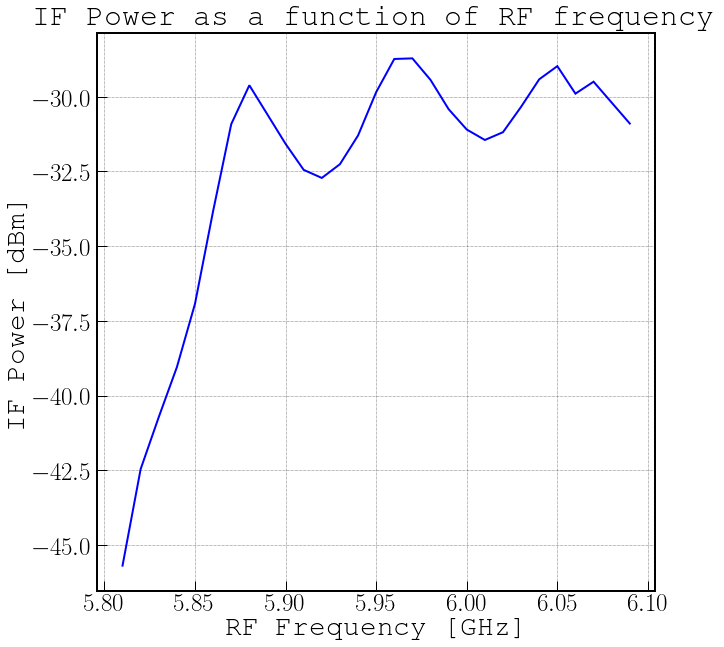

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(RF_freq, IF_power, 'b')
ax.set_xlabel(r'RF Frequency [GHz]')
ax.set_ylabel(r'IF Power [dBm]')
ax.axis('tight')
ax.set_title('IF Power as a function of RF frequency')
ax.grid(which='both');
plt.savefig(save_dir + 'IF_Power_vs_RF_frequency.pdf')

In [13]:
LO_P = np.arange(-5, 8 ,1)
IF_P = np.array([-50.67,-40.64,-37.04,-34.82,-33.33,-32.44,-31.94,-31.65,-31.52,-31.64,-31.92,-32.65,-34])

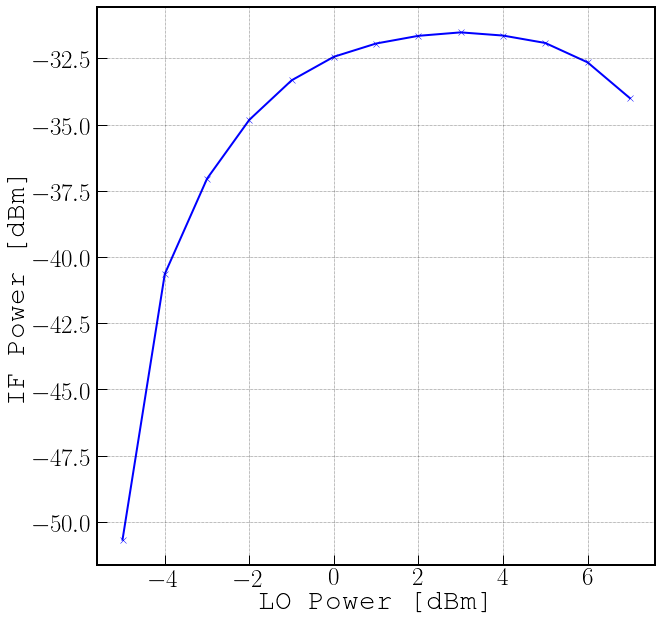

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(LO_P, IF_P, 'b-x')
ax.set_xlabel(r'LO Power [dBm]')
ax.set_ylabel(r'IF Power [dBm]')
ax.axis('tight')
ax.grid(which='both');
plt.savefig(save_dir + 'IF_Power_vs_LO_power.pdf')

In [18]:
# The LO power at which the IF power is maximized
print("The IF power is maximized at LO power = -{0:1f} dBm".format(LO_P[np.where(IF_P == np.max(IF_P))[0]][0]))

The IF power is maximized at LO power = -3.000000 dBm


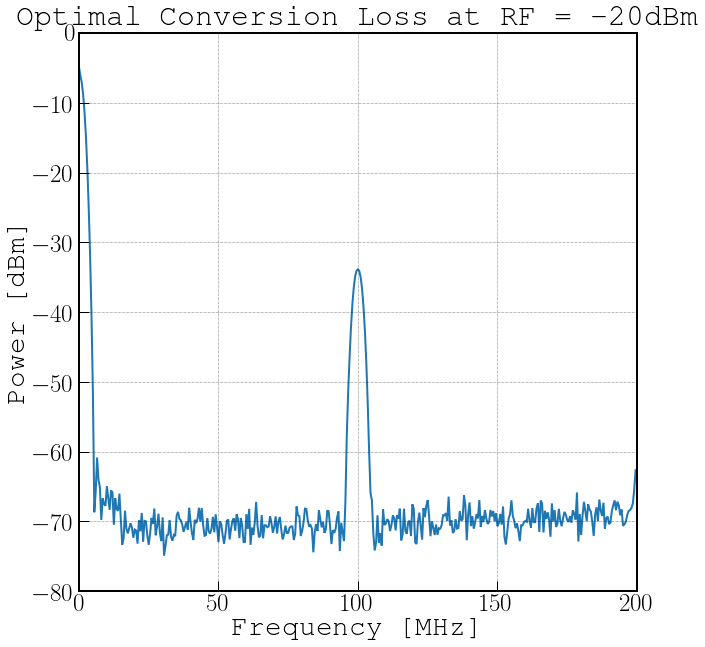

In [44]:
# f_15 += 100
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(f_15, P_15)
ax.set_xlabel(r'Frequency [MHz]')
ax.set_ylabel(r'Power [dBm]')
ax.axis([0, 200, -80, 0])
# ax.axis('tight')
ax.grid(which='both');
ax.set_title(r'Optimal Conversion Loss at RF = -20dBm')
plt.savefig(save_dir + 'DC_to_200MHz_optimal.pdf')

In [48]:
# Find the peak IF power
mask = np.logical_and(f_15 > 45, P_15 > -35)
P_15[mask]

array([-34.8749524 , -34.08078175, -33.888127  , -34.15484115])

In [49]:
# Do a curve fit to the few points within the mask as a quadratic approximation
# Model is X = [a, b, c] such that P_10[mask] = a * f_10[mask]^2 + b * f_10[mask] + c
A = np.vstack([f_15[mask]**2, f_15[mask], np.ones_like(f_15[mask])]).T
X = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, P_15[mask]))

quadratic = lambda f: X[0] * f**2 + X[1] * f + X[2]
f = np.linspace(np.min(f_15[mask]), np.max(f_15[mask]), 100)
P = quadratic(f)
print (np.max(P))

-33.8659656049


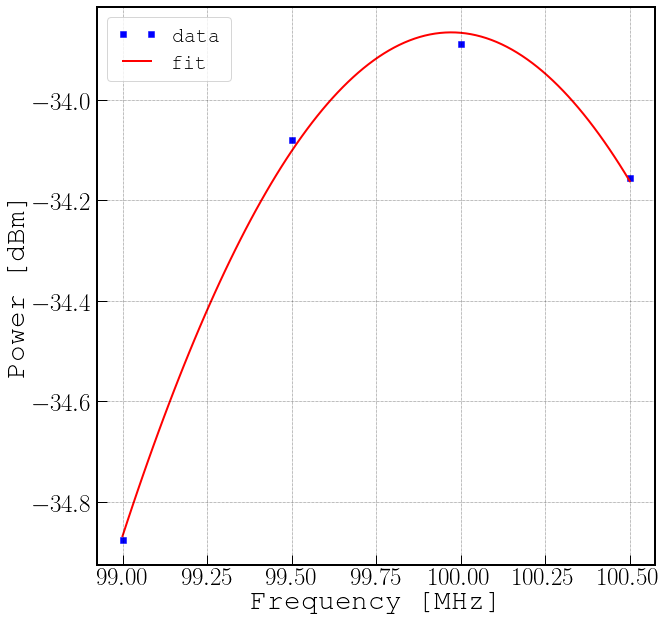

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(f_15[mask], P_15[mask], 'bs', label='data')
ax.plot(f, P, 'r', label='fit')
ax.set_xlabel(r'Frequency [MHz]')
ax.set_ylabel(r'Power [dBm]')
ax.axis('tight')
ax.legend(loc='best')
ax.grid(which='both');
plt.savefig(save_dir + 'DC_to_200MHz_optimal_zoomed.pdf')

In [51]:
P_RF = np.arange(-30,1)
P_IF = np.array([-41.37,-40.3,-39.33,-38.32,-37.3,-36.36,-35.33,-34.41,-33.36,-32.5,-31.57,-30.47,-29.55,-28.62,\
                 -27.6,-26.67,-25.78,-24.87,-24.14,-23.35,-22.67,-22.02,-21.54,-21.54,-20.91,-20.77,-20.68,-20.66,\
                 -20.68,-20.32,-19.98])

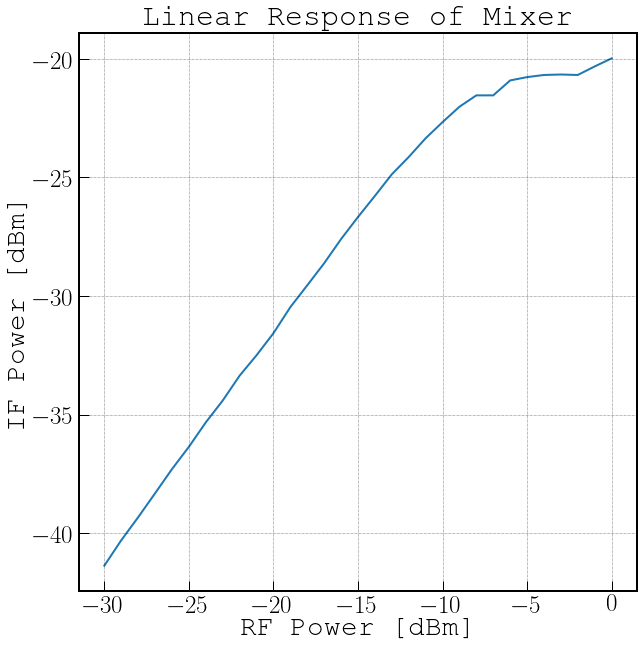

In [58]:
# f_15 += 100
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(P_RF, P_IF)
ax.set_xlabel(r'RF Power [dBm]')
ax.set_ylabel(r'IF Power [dBm]')
# ax.axis([0, 200, -80, 0])
ax.axis('tight')
ax.grid(which='both');
ax.set_title(r'Linear Response of Mixer')
plt.savefig(save_dir + 'compression_point.pdf')

In [59]:
mask = P_RF < -20
A = np.vstack([P_RF[mask], np.ones_like(P_IF[mask])]).T
X = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, P_IF[mask]))

x = np.r_[-30:0:100j]
y = X[0] * x + X[1]

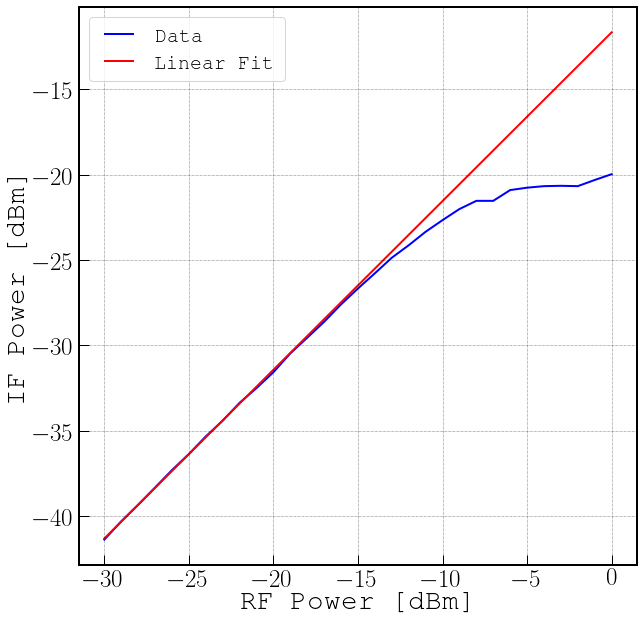

In [70]:
# f_15 += 100
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(P_RF, P_IF,'b', label='Data')
ax.plot(x,y,'r', label='Linear Fit')
ax.set_xlabel(r'RF Power [dBm]')
ax.set_ylabel(r'IF Power [dBm]')
# ax.axis([0, 200, -80, 0])
ax.axis('tight')
ax.grid(which='both');
ax.legend(loc='best')
# ax.set_title(r'Linear Response of Mixer');
plt.savefig(save_dir + 'compression_point_fitted.pdf')

In [67]:
# Now we can find the 1dB compression point since we have the linear response figured out
diff = (X[0] * P_RF + X[1]) - P_IF
points = np.where(diff >= 1)[0]
print(points)
P_RF[points]

[20 21 22 23 24 25 26 27 28 29 30]


array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0])

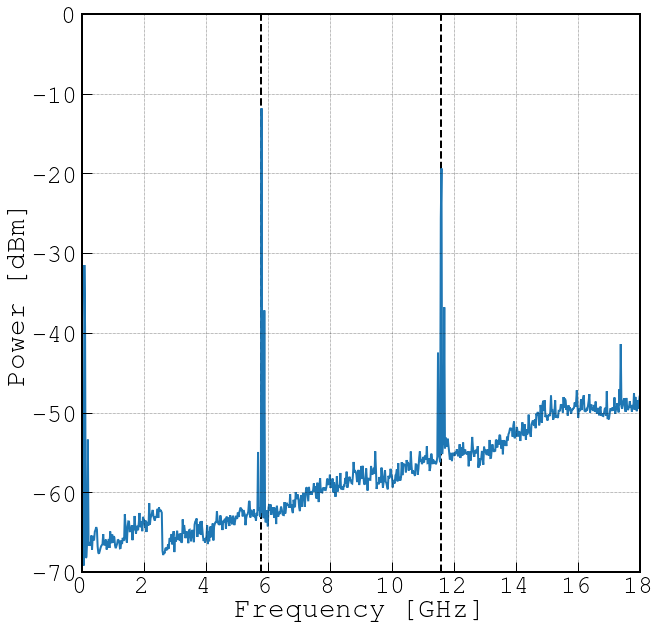

In [83]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(f_17, P_17)
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Power [dBm]')
ax.axis([0, 18, -70, 0])
ax.set_xticks(np.arange(0,19,2))
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:1.0f}"))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:1.0f}"))
ax.grid(which='both');
ax.vlines(5.8, -70, 0, colors='k', linestyles='dashed')
ax.vlines(11.6, -70, 0, colors='k', linestyles='dashed')
plt.savefig(save_dir + 'DC_to_18GHz.pdf')

In [88]:
P_fundamental = np.max(P_17[:400])
P_first = np.max(P_17[400:])

diff = P_fundamental - P_first
print(diff)

13.371560986


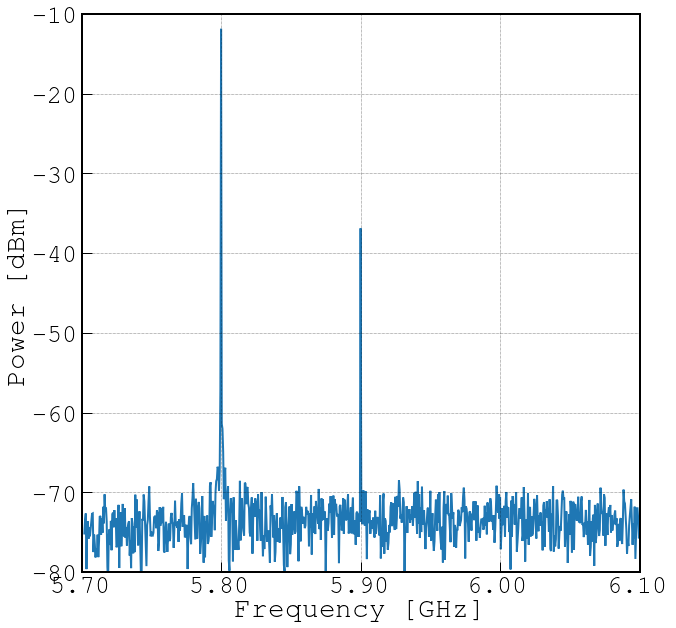

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(f_18, P_18)
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Power [dBm]')
ax.axis([5.7, 6.1, -80, -10])
# ax.set_xticks(np.arange(0,19,2))
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:1.2f}"))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:1.0f}"))
ax.grid(which='both');
# ax.vlines(5.8, -70, 0, colors='k', linestyles='dashed')
# ax.vlines(11.6, -70, 0, colors='k', linestyles='dashed')
# plt.savefig(save_dir + 'DC_to_18GHz.pdf')

In [96]:
# Now we can find the RF Isolation
RF_leakage = np.max(P_18[250:])
print(RF_leakage)

-36.87968063
